In [82]:
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import numpy as np
import seaborn as sns

In [120]:
import json

# Read data from file:
UOW_popularTimes = json.load( open( "UOW_popularTimes.json" ) )

for key, value in UOW_popularTimes.items() :
    print(key)

Ernest by Hemingway
Panizzi
Rush Cedar's Courtyard
Ugly Duckling
UOW UniBar
UOW Library
UniActive
UOW IGA
Early Start Discovery Space
Wollongong Botanic Garden
Cleaver and Co Quality Meats
Woonona Pizza Kitchen
Chimichangas Bulli


In [103]:
def popularTimesRisk(hour, day, where, datafile):
    from statistics import mean
    import json
    """
    Args:
        hour: (0-23), When one will visit a location in terms of hour of the day in 24hr time
        day: (Day name), Day of the week when one will visit a location
        where: (location name), location one will attent 
        datafile: (JSON data file), containing all popular times data 

    Return: Value of risk based on the poularity of the location
    """
    try:
        UOW_popularTimes = json.load( open( datafile ) )
    except Exception as e:
        print("ERROR: Unable to open file:",datafile,'\n')
        print(e)
        return
    try:
        data = UOW_popularTimes[where]
    except Exception as e:
        print("ERROR: Unable to find location",where,"in dataset.",'\n')
        print(e)
        return
    if hour not in range(0,23):
        print("ERROR: Value",hour,"is not in range 0-23.",'\n')
        return
    allTimes = []
    for dayName in data:
        for time in data[dayName]:
            if time != 0:
                allTimes.append(int(time))
    
    # maxim = max(allTimes)
    # print(maxim)
    locationAvg = mean(allTimes)
    try:
        now = data[day][hour]
    except Exception as e:
        print("ERROR: Unable to find busyness from day:",day,"and time",hour,"in dataset.",'\n')
        print(e)
        return

    if (now/locationAvg) > 1:
        now *= 1.1
    else:
        now *= 0.9
    
    risk = now / (locationAvg * 4)
    risk = max(0, min(1, risk))
    return risk
    
    


In [104]:
out = popularTimesRisk(15, 'Tuesday', 'Panizzi', 'UOW_popularTimes.json')
print(out)

0.30222016651248845


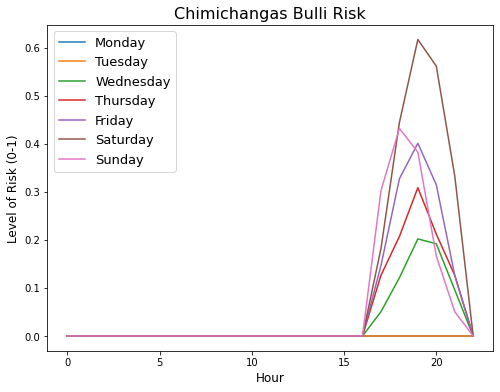

In [122]:
fig = plt.figure(figsize=(8,6))
'Woonona Pizza Kitchen'
'Chimichangas Bulli'
venue = 'Chimichangas Bulli'
list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

for i in list:
    data = []
    for j in range(0, 23):
        data.append(popularTimesRisk(j, i, venue, 'UOW_popularTimes.json'))
    
    xnew = np.linspace(0, 23, 46) 
    spl = make_interp_spline(range(0,23), data, k=2) 
    power_smooth = spl(xnew)
    # plt.plot(power_smooth, label=i)
    plt.plot(data, label=i)

plt.title(venue+' Risk', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Level of Risk (0-1)', fontsize=12)
plt.legend(fontsize=13)
plt.show()